![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

In [80]:
# Start your code here!
import pandas as pd
import numpy as np
from scipy.stats import t
import matplotlib.pyplot as plt
import pingouin

## Read the dataframes

In [81]:
men = pd.read_csv('men_results.csv')
women = pd.read_csv('women_results.csv')

## Since only FIFA World Cup matches are our target (excluding Qualifiers) and only matches after '2002-01-01'

In [82]:
men = men[(men['date'] > '2002-01-01') & (men['tournament'] == 'FIFA World Cup')]
men['total'] = men['home_score']+men['away_score']
men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup,1
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup,8
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup,2
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup,3
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup,1


In [83]:
women = women[(women['date'] > '2002-01-01') & (women['tournament'] == 'FIFA World Cup')]
women['total'] = women['home_score']+women['away_score']
women.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament,total
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup,3
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup,2
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup,5
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup,6
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup,4


## To determine whether parametric hypothesis tests to apply or non-parametric, we need to check for 3 things:

1. Randomness
2. Independence
3. Large Sample Size so that Central Limit Theorem applies
4. Normal Distribution 

### 1. Randomness

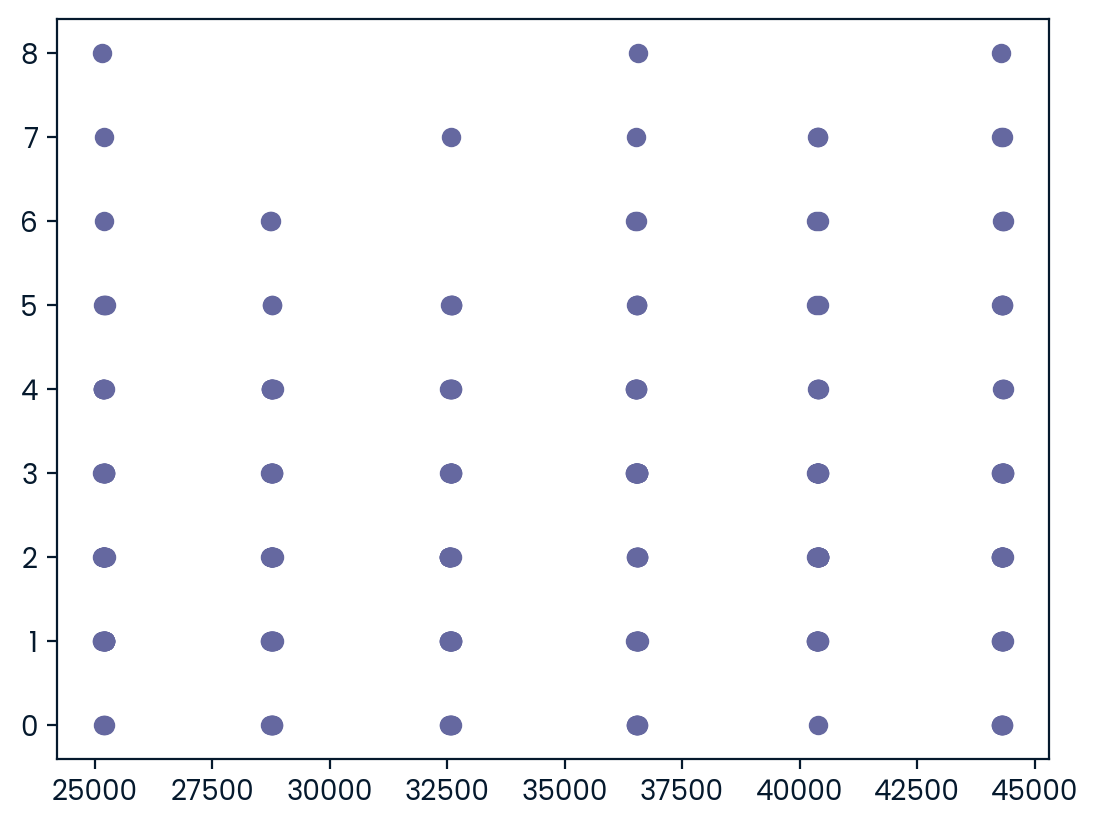

In [84]:
plt.scatter(men['Unnamed: 0'], men['total'])
plt.show()

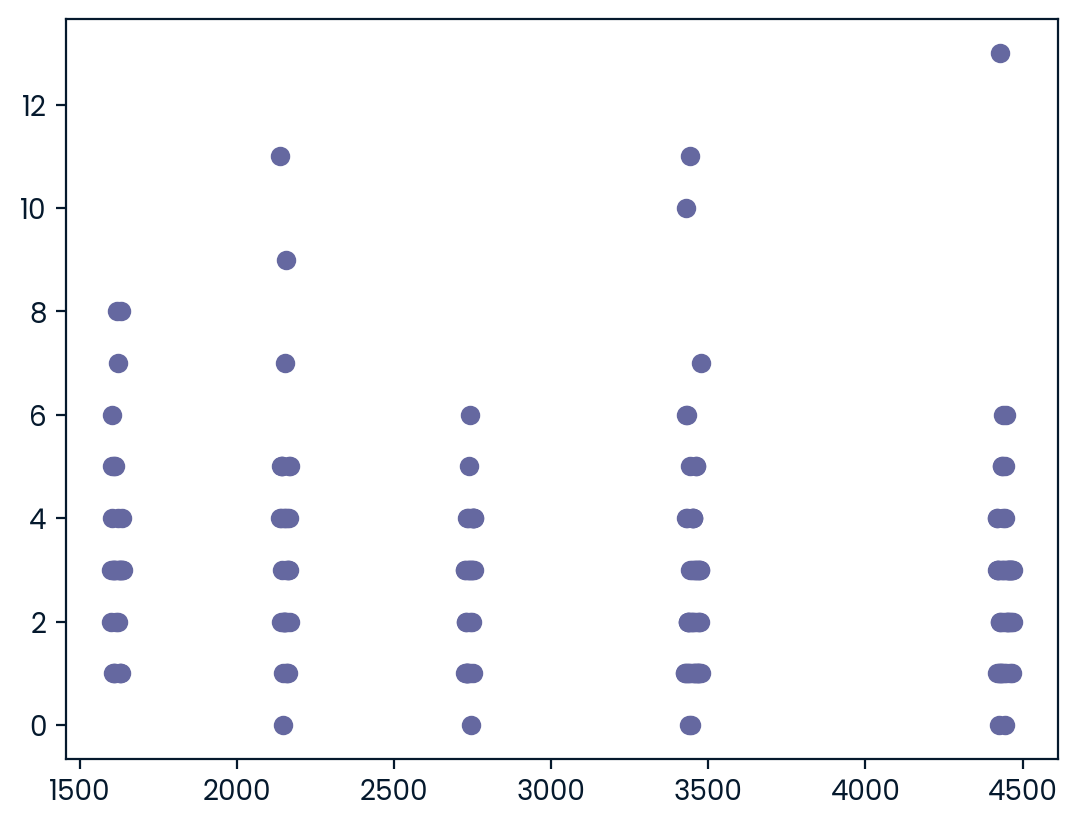

In [85]:
plt.scatter(women['Unnamed: 0'], women['total'])
plt.show()

Since there is no pattern, we can assume the data to be randomly sampled from population.

## 2. Independence

Since the question mentions "you'll also assume that each match is fully independent, i.e., team form is ignored", independence is also satisfied.

## 3: Large Sample Size

In [86]:
print(len(men), len(women))

384 200


The sample size is large enough and so Central Limit Theorem can be applied.

## 4: Normal Distribution of total goals

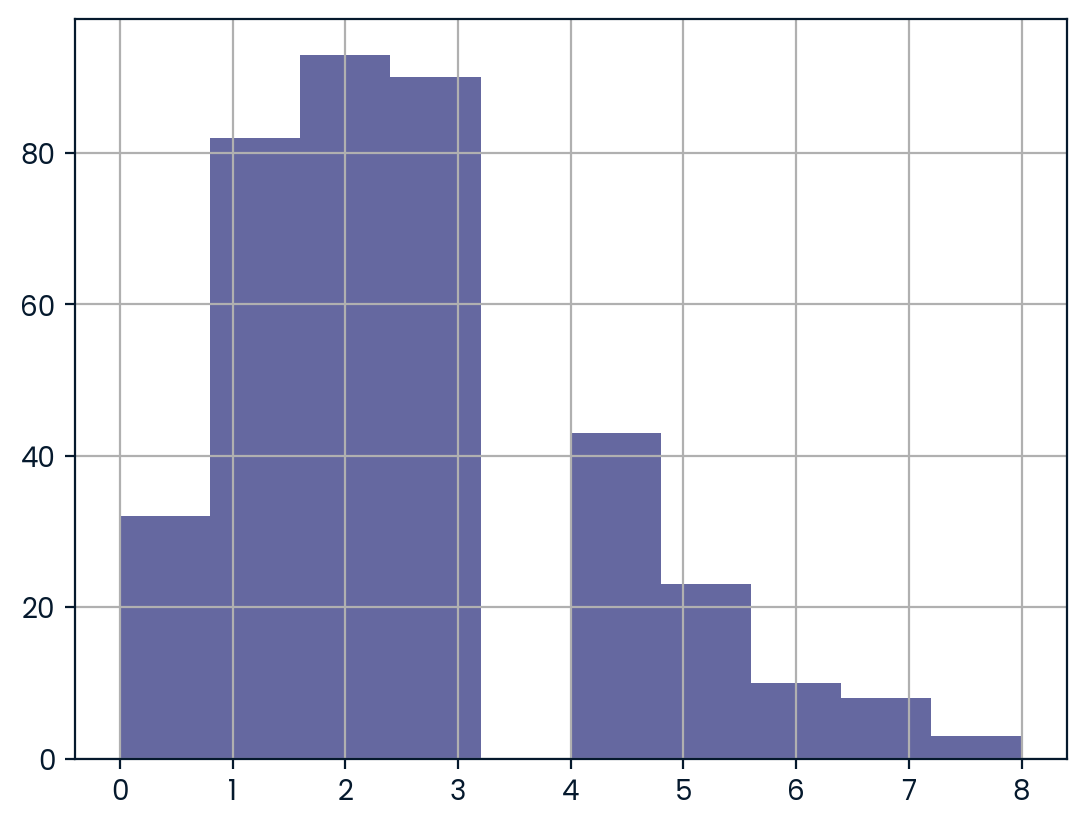

In [87]:
men['total'].hist(bins=10)
plt.show()

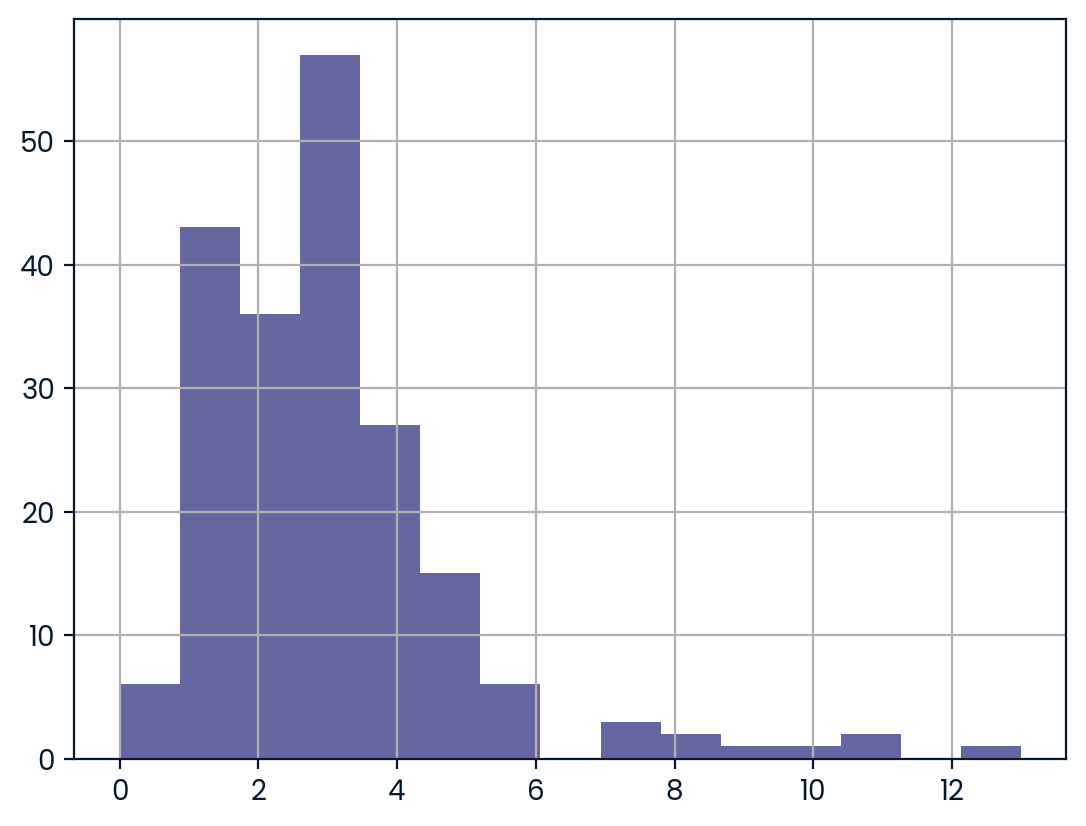

In [88]:
women['total'].hist(bins=15)
plt.show()

Thus, we can see the distribution is not normal for both men and women and is right-skewed. Hence we need non-parametric hypothesis tests.

Since, there are two groups and unpaired, we need non-parametric equivalent of unpaired t-test which is Wilcoxon-Mann-Whitney test.

## Wilcoxon-Mann-Whitney test

### STEP 1: Define null and alternate hypothesis:

Null hypothesis: The mean number of goals scored in women's international soccer matches is the same as men's.

Alternate hypothesis: The mean number of goals scored in women's international soccer matches is greater than men's.

Since, this alternate hypothesis is greater than null hypothesis, it's a right-tailed test.

### STEP 2: Set up the significance level

In [89]:
alpha = 0.1

### STEP 3: Prepare the data in required wide format to perform Wilcoxon-Mann-Whitney test:

In [90]:
men['group'] = 'men'
women['group'] = 'women'
men_and_women = pd.concat([men,women],axis=0) #Long Table (One over the Other)
men_and_women = men_and_women[['total','group']].reset_index(drop=True)
men_and_women.head()

,total,group
0,1,men
1,8,men
2,2,men
3,3,men
4,1,men


In [91]:
men_and_women_wide = men_and_women.pivot(columns='group', values='total')
men_and_women_wide.head()

group,men,women
0,1.0,NaN
1,8.0,NaN
2,2.0,NaN
3,3.0,NaN
4,1.0,NaN


## Run Wilcox-Mann-Whitney test using Pingouin library

In [92]:
test_results = pingouin.mwu(x=men_and_women_wide['women'],y=men_and_women_wide['men'], alternative='greater')
test_results

,U-val,alternative,p-val,RBC,CLES
MWU,43273.0,greater,0.005107,-0.126901,0.563451


In [93]:
p_value = test_results['p-val'].values[0]
p_value

0.005106609825443641

## Make a decision

In [94]:
if p_value <= alpha:
    result = "reject"
else:
    result = "fail to reject"

In [95]:
result_dict = {"p_val": p_value, "result": result}
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}